### Package import

In [6]:
# bug in pypfopt plotting file, should remove the style setting in plotting
import pandas as pd
import numpy as np
import pypfopt
from pypfopt import EfficientFrontier, plotting
from pypfopt import base_optimizer
import matplotlib.pyplot as plt
pypfopt.__version__

'1.5.5'

### Data Import

In [9]:
# data importation
# Expected Return of Each Asset
r = pd.read_csv('return.CSV', sep=',', header=None, index_col=0)
r = r.squeeze()
# Covariance Table of Each Asset
cov = pd.read_csv('cov.CSV', sep=',', header=0, index_col=0)



In [10]:
# show structure of cov
cov

,us_bond,us_equity,developed_equity,emerging_equity,hedge_fund,reit,commodity,gold,btc
Ticker,,,,,,,,,
us_bond,0.0033,0.0040,0.0028,0.0044,0.0012,0.0043,-0.0049,0.0041,-0.0737
us_equity,0.0040,0.0248,0.0203,0.0183,0.0090,0.0153,0.0042,0.0004,0.9619
developed_equity,0.0028,0.0203,0.0207,0.0195,0.0079,0.0115,0.0069,0.0023,0.8156
emerging_equity,0.0044,0.0183,0.0195,0.0261,0.0081,0.0116,0.0041,0.0114,-0.0785
hedge_fund,0.0012,0.0090,0.0079,0.0081,0.0038,0.0047,0.0028,0.0018,0.2155
reit,0.0043,0.0153,0.0115,0.0116,0.0047,0.0245,0.0068,0.0007,-0.2240
commodity,-0.0049,0.0042,0.0069,0.0041,0.0028,0.0068,0.0475,0.0016,0.0124
gold,0.0041,0.0004,0.0023,0.0114,0.0018,0.0007,0.0016,0.0177,-1.1228
btc,-0.0737,0.9619,0.8156,-0.0785,0.2155,-0.2240,0.0124,-1.1228,224.0111


In [11]:
# show strcuture of r
r

0
us_bond             0.020350
us_equity           0.119000
developed_equity    0.051706
emerging_equity     0.028604
hedge_fund          0.041399
reit                0.069545
commodity          -0.003898
gold                0.030725
btc                 7.298820
Name: 1, dtype: float64

Variable Explain:\
us_bond: U.S. Bonds\
us_equity: U.S.Total Equities\
developed_equity: Developed-Market Equities Ex US\
emerging_equity: Emerging-Market Equities\
hedge_fund: Hedge Funds\
reit: Global REITS\
commodity: Commodities\
gold: Gold\
btc: BTC

### Question
Given Assets and Target Portfolio and portfolio standard deviation, combinated:  
 with gold and btc  
 with gold and no btc  
 with btc and no gold  
 without gold and btc.  
 
 find whether gold and bitcoin can diversify and the best return\
 
Q1: US bonds, US total Equity.  
Q2: US bonds, US total Equity, Global REITs, Commodities  
Q3: US bonds, US total Equity, Developed-Market Equities Ex US, Emerging-Market Equities, Hedge Funds, Global REITs, Commodities  


In [77]:
# construct sector map to add constraint in optimisation

sector_mapper = {
    "us_bond": "us_bond",
    "us_equity": "us_equity",
    "developed_equity": "developed_equity",
    "emerging_equity": "emerging_equity",
    "hedge_fund": "hedge_fund",
    "reit": "reit",
    "commodity": "commodity",
    "gold": "gold",
    "btc": "btc"
}

In [13]:
# standard deviation to variance
for i in range(2,18,2):
    print(f"std {i/100} is variance {np.round((i/100)*(i/100), 4)}")

std 0.02 is variance 0.0004
std 0.04 is variance 0.0016
std 0.06 is variance 0.0036
std 0.08 is variance 0.0064
std 0.1 is variance 0.01
std 0.12 is variance 0.0144
std 0.14 is variance 0.0196
std 0.16 is variance 0.0256


# Q1 Demo: US bonds, US total Equity.


In [90]:
#construct portfolio, bounds from -1 to 1 mean we can short the asset. adjust to (0, 1) to ban short trade
ef = EfficientFrontier(r, cov, weight_bounds=(0, 1))
# ef = EfficientFrontier(r, cov)

In [80]:
#setting constraint (number from 0 ~ 1)
sector_lower = {} # no at least requirement
sector_upper = {
    # assets below will not join the portfolio, not higher than 0%
    "developed_equity": 0,
    "emerging_equity": 0,
    "hedge_fund": 0,
    "reit": 0,
    "commodity": 0,
    "gold": 0,
    "btc": 0
}

# adding constraint
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

In [86]:
# Return Weight of Portfolio with given volatility(std)
ef.efficient_risk(0.06)
weights = ef.clean_weights()
weights

OrderedDict([('us_bond', 0.90779),
             ('us_equity', 0.09221),
             ('developed_equity', 0.0),
             ('emerging_equity', 0.0),
             ('hedge_fund', 0.0),
             ('reit', 0.0),
             ('commodity', 0.0),
             ('gold', 0.0),
             ('btc', 0.0)])

In [87]:
# return (expected return, volatility, sharpe ratio)
ef.portfolio_performance()

(0.02944697770194462, 0.060000000031881356, 0.15744962828208187)

#### Question 1 Sample, portfolio with btc but no gold

In [92]:
# construct portfolio
ef = EfficientFrontier(r, cov, weight_bounds=(0, 1))

#setting constraint (number from 0 ~ 1)
sector_lower = {} # no at least requirement
sector_upper = {
    # assets below will not join the portfolio, not higher than 0%
    "developed_equity": 0,
    "emerging_equity": 0,
    "hedge_fund": 0,
    "reit": 0,
    "commodity": 0,
    "gold": 0,
    "btc": 1
}

# adding constraint
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

# Optimise Portfolio with given volatility(std)
ef.efficient_risk(0.06)
weights = ef.clean_weights()
weights

C:\Users\liang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


OrderedDict([('us_bond', 0.94939),
             ('us_equity', 0.04959),
             ('developed_equity', 0.0),
             ('emerging_equity', 0.0),
             ('hedge_fund', 0.0),
             ('reit', 0.0),
             ('commodity', 0.0),
             ('gold', 0.0),
             ('btc', 0.00102)])

In [93]:
# return (expected return, volatility, sharpe ratio)
ef.portfolio_performance()

(0.03267212797786981, 0.06000000000019907, 0.21120213296379606)

In [88]:
# Return Weight of Portfolio with max sharpe ratio
# ef.max_sharpe()


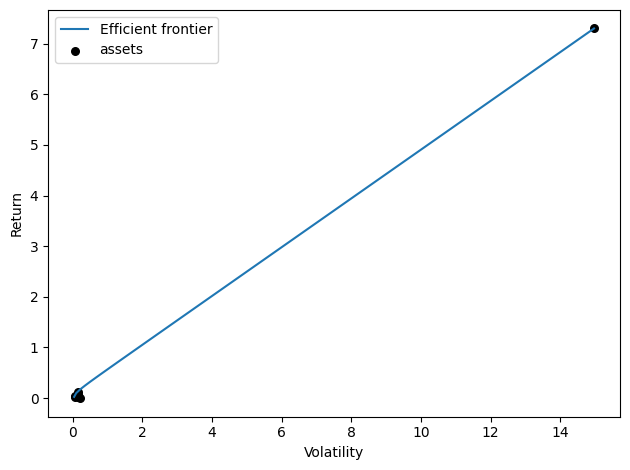

In [91]:
# Block used to plotting (unfinished)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()